<a href="https://colab.research.google.com/github/aufawibowo/lstm-under-different-stability/blob/master/Notebook_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pre-work

## Load libraries

In [0]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from subprocess import check_output
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

## Data source

In [0]:
input_file = [  "/content/drive/My Drive/tugas akhir/SZSE 200 Historical Data.csv",
                "/content/drive/My Drive/tugas akhir/SZSE 300 Price Historical Data.csv",
                "/content/drive/My Drive/tugas akhir/Shanghai Shenzhen CSI 300 Historical Data.csv" ]
input_file = input_file[0]

## Load dataset

In [18]:
# load the dataset
df = pd.read_csv(input_file, header=0, index_col=None, delimiter=',')
df.head()

,Date,Open,High,Low,Price,Adj. Close,Vol.,Change %
0,28-Feb-20,4458.93,4536.39,4357.07,4371.04,NaN,97.95K,-5.59%
1,27-Feb-20,4632.89,4698.45,4548.18,4629.98,NaN,90.27K,0.57%
2,26-Feb-20,4707.04,4737.97,4587.62,4603.59,NaN,11.55B,-3.49%
3,25-Feb-20,4630.71,4784.55,4540.15,4769.89,NaN,11.83B,0.76%
4,24-Feb-20,4654.82,4750.87,4627.49,4734.05,NaN,10.11B,1.52%


In [19]:
print(df.head())
print(df.shape)
print(df.columns)
print(len(df))

        Date     Open     High      Low    Price  Adj. Close    Vol. Change %
0  28-Feb-20  4458.93  4536.39  4357.07  4371.04         NaN  97.95K   -5.59%
1  27-Feb-20  4632.89  4698.45  4548.18  4629.98         NaN  90.27K    0.57%
2  26-Feb-20  4707.04  4737.97  4587.62  4603.59         NaN  11.55B   -3.49%
3  25-Feb-20  4630.71  4784.55  4540.15  4769.89         NaN  11.83B    0.76%
4  24-Feb-20  4654.82  4750.87  4627.49  4734.05         NaN  10.11B    1.52%
(1011, 8)
Index(['Date', 'Open', 'High', 'Low', 'Price', 'Adj. Close', 'Vol.',
       'Change %'],
      dtype='object')
1011


## Explanatory Data Analysis 

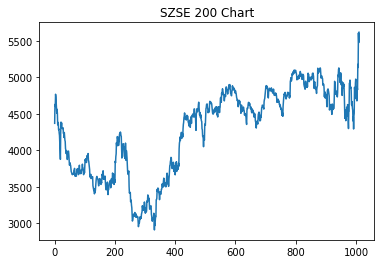

In [20]:
df['Price'].plot()
plt.title("SZSE 200 Chart")
plt.show()

Text(0.5, 1.0, 'SZSE 200 Cumulative Return')

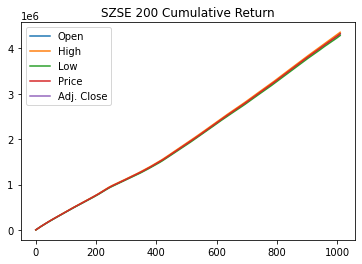

In [21]:
dr = df.cumsum()
dr.plot()
plt.title('SZSE 200 Cumulative Return')

Text(0.5, 1.0, 'SZSE 200 Autocorrelation')

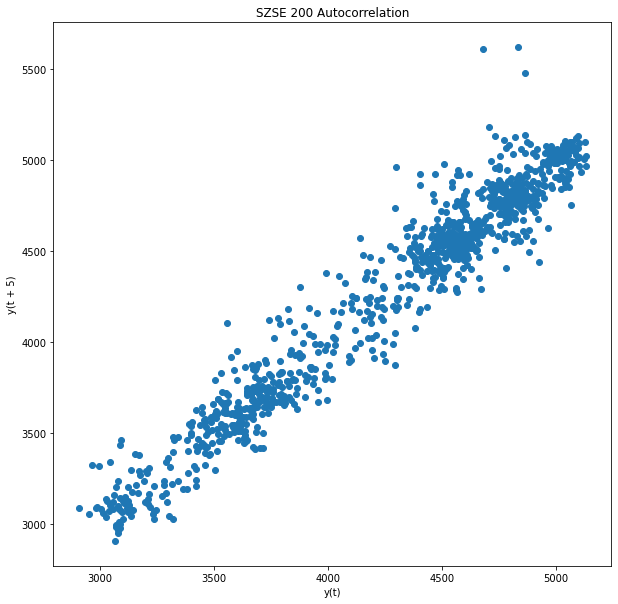

In [22]:
plt.figure(figsize=(10,10))
lag_plot(df['Price'], lag=5)
plt.title('SZSE 200 Autocorrelation')

# ARIMA

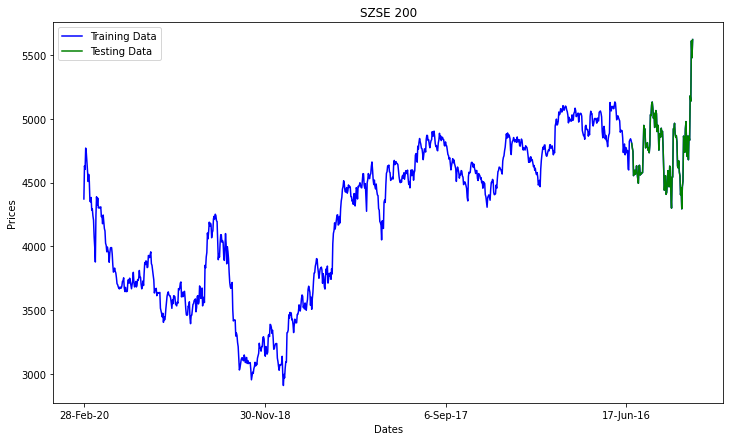

In [23]:
train_data, test_data = df[0:int(len(df)*0.9)], df[int(len(df)*0.9):]
plt.figure(figsize=(12,7))
plt.title('SZSE 200')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Price'], 'blue', label='Training Data')
plt.plot(test_data['Price'], 'green', label='Testing Data')
plt.xticks(np.arange(0,len(df), 300), df['Date'][0:len(df):300])
plt.legend()

In [0]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [25]:

train_ar = train_data['Open'].values
test_ar = test_data['Open'].values

history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>
Testing Mean Squared Error: 21582.906
Symmetric mean absolute percentage error: 5.779


In [28]:
predictions

[array([4805.74094854]),
 array([4760.94989514]),
 array([4749.94335128]),
 array([4559.40490466]),
 array([4554.0171817]),
 array([4577.43046515]),
 array([4555.77409169]),
 array([4623.25238091]),
 array([4618.82080481]),
 array([4592.40110264]),
 array([4486.9654901]),
 array([4497.10032452]),
 array([4593.04643863]),
 array([4636.11807829]),
 array([4540.25643407]),
 array([4559.56603053]),
 array([4504.42773982]),
 array([4609.81758662]),
 array([4566.22307912]),
 array([4707.45853523]),
 array([4944.74495497]),
 array([4905.47556341]),
 array([4899.97863821]),
 array([4763.98038139]),
 array([4764.08936714]),
 array([4793.35597574]),
 array([4821.02293645]),
 array([4747.45786634]),
 array([4763.79139756]),
 array([4698.99309066]),
 array([4781.10551115]),
 array([5045.63190243]),
 array([5041.13132401]),
 array([5073.70995442]),
 array([5122.34581332]),
 array([5109.87232499]),
 array([5037.73607072]),
 array([5043.83199416]),
 array([4978.48771472]),
 array([4935.93864135]),
 a

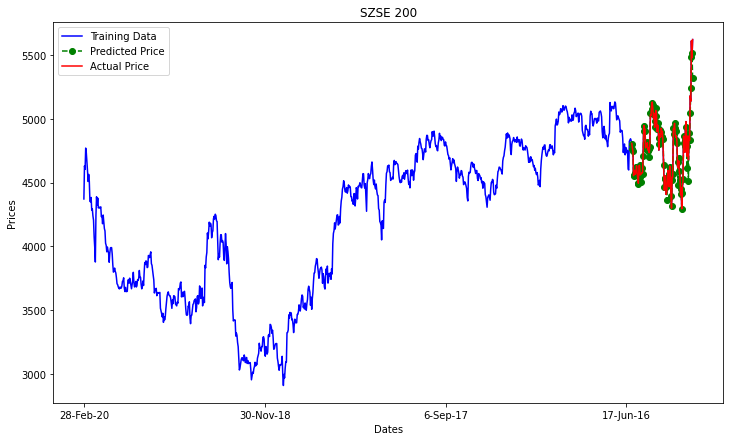

In [26]:
plt.figure(figsize=(12,7))
plt.plot(df['Price'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Price'], color='red', label='Actual Price')
plt.title('SZSE 200')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,len(df), 300), df['Date'][0:len(df):300])
plt.legend()

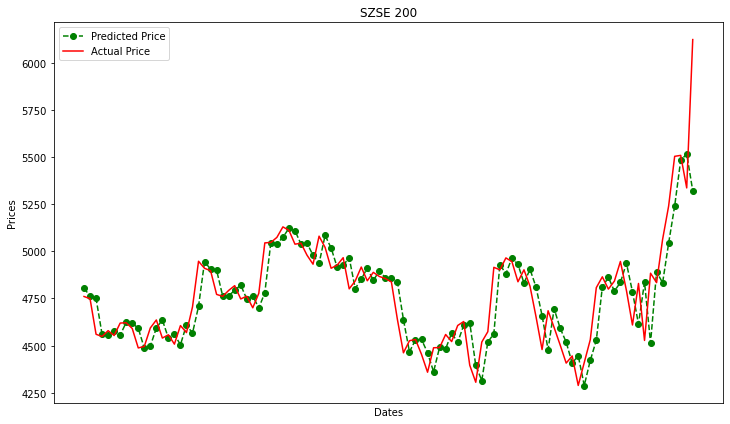

In [27]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.xticks(np.arange(1486,len(df), 60), df['Date'][1486:len(df):60])
plt.title('SZSE 200')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()